
 # Part I - FORD BIKE DATA EXPLORATION
## by Cletus Lunalo

# Introduction
This dataset provides information on  individual rides made in a bike-sharing system  that covers the greater San Francisco Bay area.The data was collected in February 2019.Prior ro wrangling the dataset contained 174952 rows and 15 column.Variables in the dataset includes the start and end times for each trip,the duration, names,latitudes and longitudes of the start and end stations.It also includes details of each user such as the gender,birth year,type of user(customer or subscriber) and whether they shared a bike or not.


# Preliminary Wrangling


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
## packages for plotting lat and longs
import folium
import math
from folium.plugins import MarkerCluster, HeatMap
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from folium import Marker

%matplotlib inline
sb.set_theme(style="white")


In [5]:
## loading the dataset
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(bike_df.head(10))

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6          1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7          1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8          1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9          1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   

In [6]:
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

    a) Features such as `start_station_id`,`start_station_name` have missing values.The nulls are not very many thus we can drop them.
    b) Incorrect data types fpr start_time,end_time,start_station_id,end_station_id,bike_id,member_birth_year.

# Data cleaning



### Define
Drop all missing values 

### Code

In [7]:
bike_df.dropna(inplace = True)

### Test

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### Define
Change all incorrect datatypes

### Code

In [9]:
dates = ['start_time','end_time']
as_objects = ['start_station_id','end_station_id','bike_id']
as_categories = ['member_gender','user_type']

for c in dates:
    bike_df[c] = pd.to_datetime(bike_df[c])
for a in as_objects:
    bike_df[a] = bike_df[a].astype(str)
for b in as_categories:
    bike_df[b] = bike_df[b].astype('category')
bike_df.member_birth_year = bike_df.member_birth_year.astype(int)

### Test

In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### Define
Change the columns with long names to shorter ones for better visual apperance in plots.

### Code

In [11]:
bike_df.rename(columns = {'duration_sec':'duration','start_station_name':
                          'start_station','end_station_name':'end_station',
                          'member_birth_year':'birth_year','member_gender':'gender',
                          'bike_share_for_all_trip':'bike_share','start_station_latitude':'start_lat',
                          'start_station_longitude':'start_long','end_station_latitude':'end_lat',
                          'end_station_longitude':'end_long' },inplace = True)

### Test

In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   duration          174952 non-null  int64         
 1   start_time        174952 non-null  datetime64[ns]
 2   end_time          174952 non-null  datetime64[ns]
 3   start_station_id  174952 non-null  object        
 4   start_station     174952 non-null  object        
 5   start_lat         174952 non-null  float64       
 6   start_long        174952 non-null  float64       
 7   end_station_id    174952 non-null  object        
 8   end_station       174952 non-null  object        
 9   end_lat           174952 non-null  float64       
 10  end_long          174952 non-null  float64       
 11  bike_id           174952 non-null  object        
 12  user_type         174952 non-null  category      
 13  birth_year        174952 non-null  int32         
 14  gend

 The dataset has more than 180,000 rows and 16 columns.The main important features in the dataset include the `member_gender`,`bike_share_for_all_trip`,`member_birth_year`,`user_type`,`duration_sec`,`station_name`,`start` and `end times`.


In [13]:
bike_df.describe()

,duration,start_lat,start_long,end_lat,end_long,birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [14]:
### save copy
bike = bike_df.copy()

# Data exploration

The aim of this exploration is to perfrom a descriptive visual analysis of the characteristics of the trips made by the users.The analysis will start with univariate analysis followed by bivariate analysis and end with multivariate analysis.No statisctal tests will be conducted.

## Univariate Exploration


In [15]:
bike.duration.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration, dtype: float64

### What is the  distribution of the duration of bike rides?

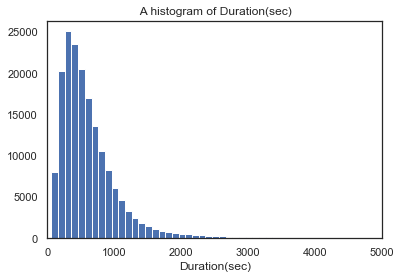

In [16]:
## define a function to create histograms
def histoplot(bsize,col,a,b,bin_lim,label):
    """A function to plot a histogram"""
    bin_size = bsize
    bins = np.arange(bin_lim,bike[col].max() + bin_size, bin_size)
    plt.hist(data = bike,x = col,bins = bins)
    plt.xlabel(f'{label}')
    plt.xlim(a,b)
    plt.title(f' A histogram of {label}')
histoplot(100,'duration',0,5000,61,'Duration(sec)')

 The distribution is  unimodal with a very long long right tail.This shows that  is alot of outliers.Majority of the values are observed between 400-1000 while the right tail extendes to more than 80,000 .Lets try logtransforming this variable to see if this tail will be minimized.

In [17]:
np.log10(bike.duration).describe()

count    174952.000000
mean          2.707824
std           0.305190
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration, dtype: float64

Text(0.5, 1.0, 'A histogram of Bike Duration')

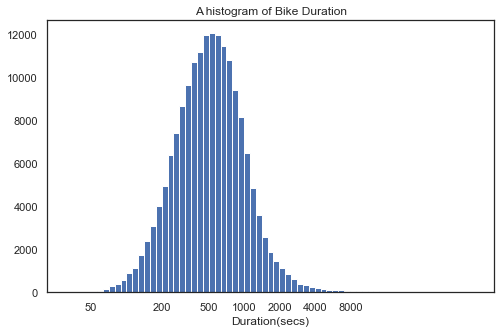

In [18]:
plt.figure(figsize=[8, 5])
bin_size = 0.05
bins =  10** np.arange(1.5,np.log10(bike['duration'].max()) + bin_size, bin_size)
plt.hist(data = bike,x = 'duration',bins = bins)
plt.xlabel('Duration(sec)')
plt.xscale('log')
ticks = [50,200,500,1000,2000,4000,8000]
plt.xticks(ticks,ticks)
plt.xlabel('Duration(secs)')
plt.title('A histogram of Bike Duration')

The duration of bike rides when log transformed is a normal distribution with the majority of those rides being 500 seconds  or or roughly 8 minutes long.


## removing outliers
Log transforming has partly solved the problem of the right tail but the outliers will still biase our data.Thus I will drop these outliers.

In [19]:
bike.duration.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration, dtype: float64

In [20]:
bike = bike[bike['duration'] < 0.95 * 84548]
bike.duration.describe()

count    174946.000000
mean        701.176123
std        1569.690210
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       79548.000000
Name: duration, dtype: float64

## How many  bike trips per day?
Knowing the time,day and month people use bikes is important in determing the bike demand per day.To create this insight, I shall first generate these features from the `start_time` column.However,as the dataset was collected from the month of February in 2019,the month and year become redundat.

In [21]:
import calendar
## extract the day
bike['day'] = bike.start_time.dt.day_name()
## save as categorical
ordered_d = pd.api.types.CategoricalDtype(ordered = True,categories =['Monday','Tuesday','Wednesday',
                                                                 'Thursday','Friday','Saturday','Sunday'])
bike['day'] = bike['day'].astype(ordered_d)
bike['time'] = bike['start_time'].dt.strftime('%H:%M')
## convert time back to datetime
bike['time'] = pd.to_datetime(bike['time'],format = '%H:%M').dt.time
bike.head()

,duration,start_time,end_time,start_station_id,start_station,start_lat,start_long,end_station_id,end_station,end_lat,end_long,bike_id,user_type,birth_year,gender,bike_share,day,time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,17:32:00
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,12:13:00
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thursday,17:54:00
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday,23:54:00
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thursday,23:49:00


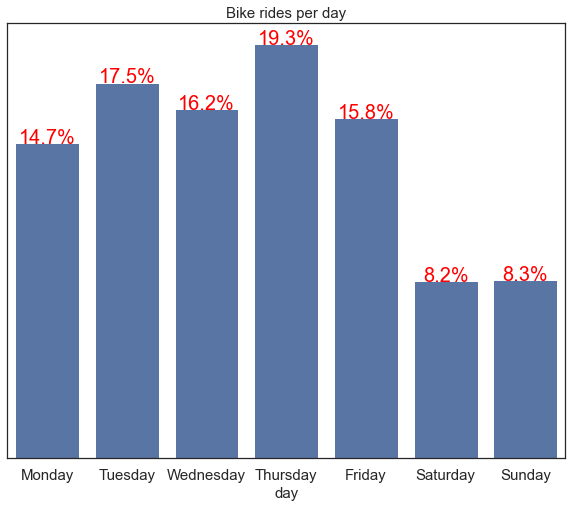

In [89]:
## Define a helper function for plotting bargraphs
def barplotter(col,rot,size, sum_freq, df,order = True):
    """a function to plot bar graphs with labels on the bars"""
    base_color = sb.color_palette()[0]
    ## get frequencies
    all_freq = df[col].value_counts()
    if order == True :
        sb.countplot(data = df,x = col,color = base_color,order = all_freq.index)
    else:
        sb.countplot(data = df,x = col,color = base_color)
    plt.xlabel(f'{col}',fontsize = 15)
    plt.ylabel('')
    plt.title(f'Bike rides per {col}',fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.yticks([])
    ## etxract tick locations and labels
    locations,labels = plt.xticks(rotation = rot)

    for location,label in zip(locations,labels):
        count = all_freq[label.get_text()]
        freq_text = '{:0.1f}%'.format(100 * count / sum_freq )
        plt.text(location,count + 2 ,freq_text,ha = 'center',color = 'red',fontsize = 20)
        rcParams['figure.figsize'] = size
size = [10,9]
sum_freq = bike.day.value_counts().sum()
barplotter('day',0, size,sum_freq,bike,order =False)

From the pot it is evident that Thursday had the highest number of bike trips followed by Tuesday.The number of trips was lowest on Sunday and Saturday.Plotting aline graph to  show the relationship between time and the number of rides can also provide more evidence of this pattern. This will be done in the bivariate section.I will also visualize assess the difference in the number of trips made by day between the gender,age,bike_share and user type.

##  The number of trips by time of day?

This section I seek to undestand how the frequency of rides changes during the day.

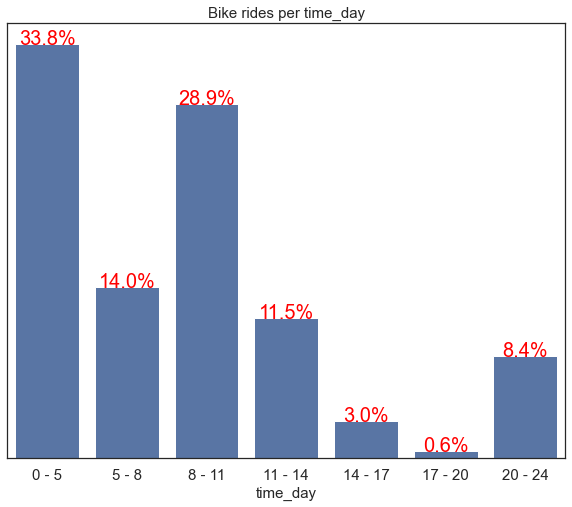

In [23]:
##  creating bins for  time
bike['time_day'] = pd.cut((bike['start_time'] - pd.Timedelta(hours = 8)).dt.hour,
                         bins = [0,5,8,11,14,17,20,24],
                         labels = ['0 - 5','5 - 8','8 - 11','11 - 14','14 - 17','17 - 20','20 - 24'],right = False)
ordered_time = pd.api.types.CategoricalDtype(ordered = True,
                        categories = ['0 - 5','5 - 8','8 - 11','11 - 14','14 - 17','17 - 20','20 - 24'])
bike['time_day'] = bike['time_day'].astype(ordered_time)
##calculate frequencies and plot
sum_freq = bike.time_day.value_counts().sum()
size = [10,8]
barplotter('time_day',0,size,sum_freq,bike,order = False)


The most frequent cycling time used by the majority of the users was between 12am to 5 am(33.8%) amd between 8 am to 11 am(28.9%).The third most frequent cycling time was between 5 am to 8 a.m.Summing up these three most frequnt cycling times, I can conclude that the majority of the user prefer riding their bikes between 12am to 11am.Riding form 5pm to 8pm was prefered by the least number of the users.

###  How is trip distance Distributed?
Since  the data contains the  coordinates of starting and ending stations we can extract distance to generates insights on the average distance covered by most bike users.

In [28]:
def dist(x):
    """function to calculate distance between two coordinates"""
    import geopy
    from geopy import distance
    try:
        return  geopy.distance.geodesic((x['start_lat'],x['start_long']),
(x['end_lat'],x['end_long'])).km 
    except:
        return 0
bike['distance'] = bike.apply(dist,axis = 1)
bike.distance.describe()

count    174946.000000
mean          1.689952
std           1.096538
min           0.000000
25%           0.909710
50%           1.428159
75%           2.224992
max          69.465977
Name: distance, dtype: float64

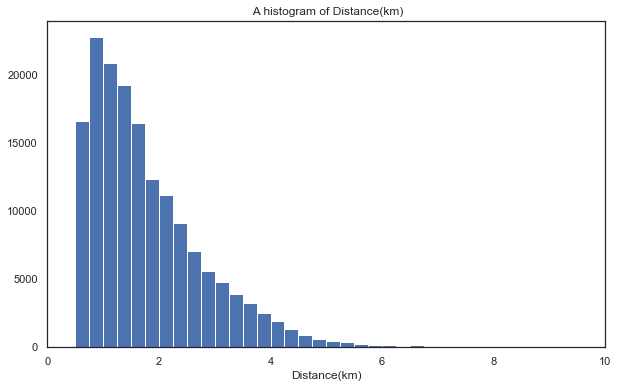

In [29]:
histoplot(0.25,'distance',0,10,0.5,'Distance(km)')

 The distribution of the distances covered by the users is  unimodal and also skewed to the right with majority of the users covering a distance of less than 1.4 km.

### What are the proportions of user type categories?

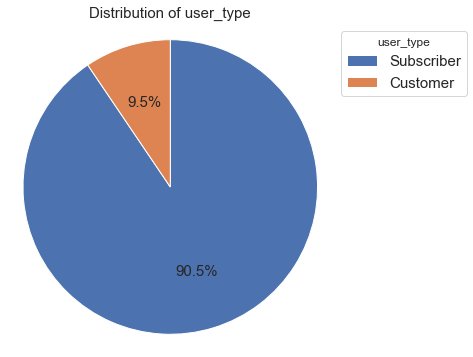

<Figure size 432x432 with 0 Axes>

In [31]:
def pieplot( col):
    types = bike[col].value_counts()
    size = [6,6]
    plt.pie(types,labels = None,autopct = '%1.1f%%',startangle = 90,
            counterclock = False,textprops = {'fontsize' :15})
    plt.title(f'Distribution of {col}',fontsize = 15)
    plt.axis('square')
    plt.legend( labels = types.index, title = col,fontsize = 15, bbox_to_anchor = [1,1])
    plt.figure(figsize = (6,6))
pieplot('user_type')

The majority of the bike users are subscribers(90%) while less than 10% of them are Customers.In later plots,I shall assess how these categories vary in terms of the trips made by day and time and the distance and duration covered.

### What is the distribution of age among the bike users?
To answer this question I generate an `age` feature from the `member_birth_year`.

In [32]:
bike['age'] =  (2022 - bike.birth_year).astype('int')
bike.age.describe()

count    174946.000000
mean         37.196712
std          10.118560
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: age, dtype: float64

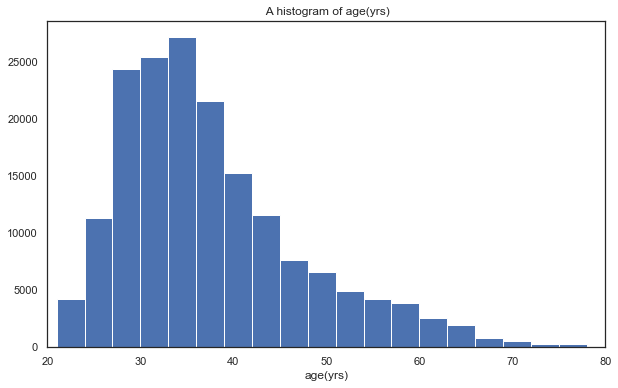

In [33]:
histoplot(3,'age',20,80,21,'age(yrs)')

 The distribution of age is unimodal.Most of the users have ages ranging from 26 to 40 years.The data  also has a large skew on the right.This indicates that there are some very elderly bike users.

### Total trips made by age group?

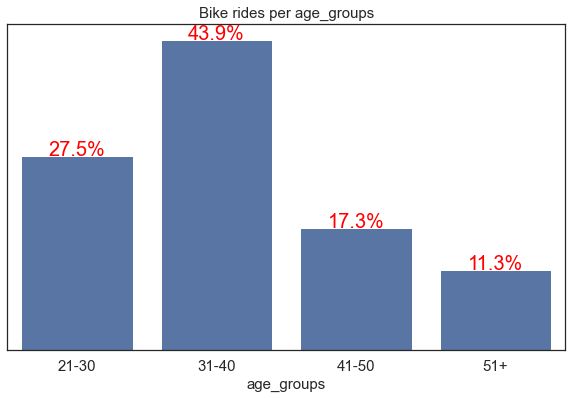

In [34]:
## generate age_group classes
bike['age_groups'] = pd.cut(x = bike['age'], bins = [21,30,40,50,144],labels =['21-30','31-40','41-50','51+']).astype('str')
ordered_cats = pd.api.types.CategoricalDtype(ordered = True,categories = ['21-30','31-40','41-50','51+'])
bike['age_groups'] = bike['age_groups'].astype(ordered_cats)

sum_freq = bike.age_groups.value_counts().sum()
size = [9,8]
barplotter('age_groups',0,size,sum_freq,bike,order = False)

Almost half of the bike riders are between the ages of 31-40(44%) followed by the ages of 21-30%.These two age groups account for  more than 70% of the bike users.The elederly groups are not as many in the dataset.

### The proportion of bike users according to gender?


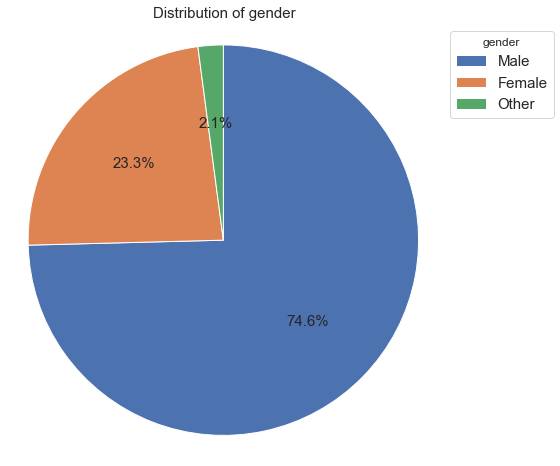

<Figure size 432x432 with 0 Axes>

In [35]:
pieplot('gender')

The Majority of the bike users are male(75%) while less than a quarter are female(23%).

### The proportion of users who share a bike?

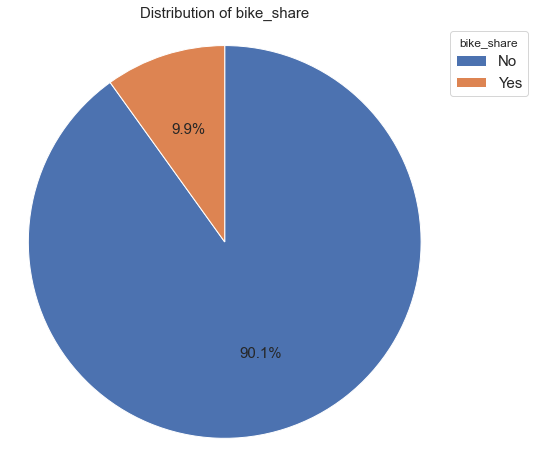

<Figure size 432x432 with 0 Axes>

In [36]:
pieplot('bike_share')

Less than 10% of the total bike users share a bike for the whole trip.

### BIVARIATE ANALYSIS

### What is the relationship between trip duration and age?

bike.shape= (174946, 22)
bike_sample.shape= (500, 22)


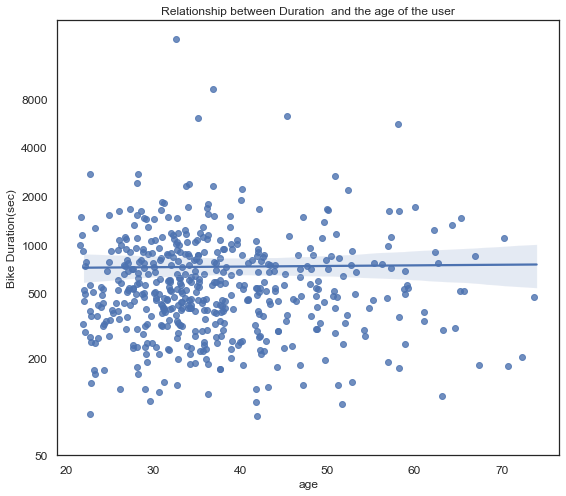

In [37]:
#a sample 500  bbike users to reduce overplotting and porduce cleaner plots
print("bike.shape=",bike.shape)
bike_sample = bike.sample(n=500, replace = False)
print("bike_sample.shape=",bike_sample.shape)
sb.regplot(data = bike_sample, x = 'age',y = 'duration',x_jitter = 0.4)
plt.yscale('log')
y_ticks = [50,200,500,1000,2000,4000,8000]
plt.yticks( y_ticks,y_ticks,fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel("Bike Duration(sec)",fontsize = 12)
plt.title('Relationship between Duration  and the age of the user',fontsize = 12);

 There is a very weak correlation between the duration of a bike ride and the age of a user. I was anticipating a strong negative relationship,where the duration decreases with age.The re gression line seems to point towards the inverse,where more elderly riders take longer rides than youthful riders.What is evident that there are more younger riders betweeb the ages of 20-40 who take longer rides greater than the median than there elderly riders taking such long rides.Additionally,more younger users also take shorter rides less thann the median than the elderly riders. 

### What are the trends in  trip distance?

In [46]:
## define a helper function
def line_plot(var_x,var_y,df):
    """ A function to plot a line graph"""
    plt.figure(figsize = (19,4))
    bike.groupby(var_x)[var_y].mean().plot(kind = 'line',color = 'blue')
    plt.title(f'Yearly trends in Average {var_y}' ,fontsize = 12)
    plt.ylabel(f"Average '{var_y}'",fontsize = 12)
    plt.xlabel(var_x,fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12);

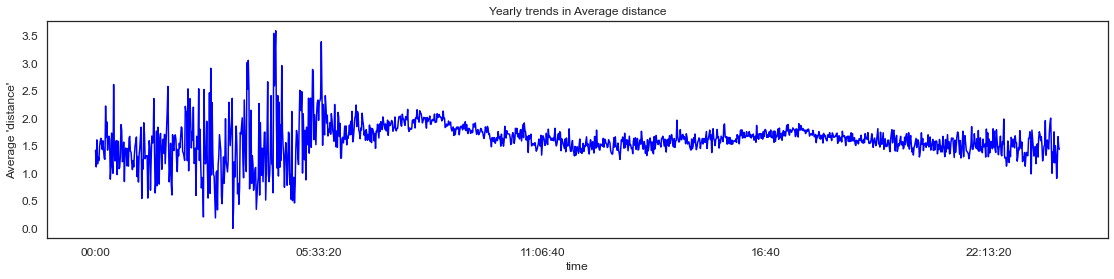

In [47]:
y_lim = [ 0,4]
line_plot("time",'distance',y_lim)

Distance covered per trip was characteristed by variability throughout the day.The highest variability was recorded from 12am to 5am.Distance covered increased steadily from 12 am to 11am and the reduced  to 10am.The distance covered is an important insight for planning purposes.Let use boxplot to assess the relationship between distance and the other categorical variables.

### Relationship between distance and time of day?

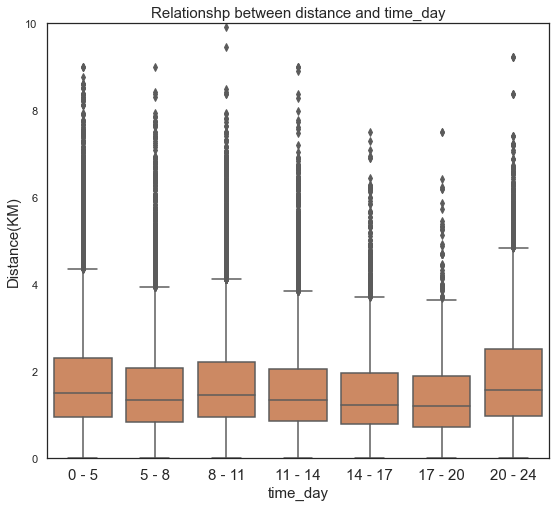

In [48]:
def plotbox(var_x,var_y,y_lim,y_label,size):
    base_color = sb.color_palette()[1]
    sb.boxplot(data = bike,x = var_x,y = var_y,color = base_color)
    plt.title(f'Relationshp between {var_y} and {var_x}',fontsize = 15)
    plt.ylabel(y_label,fontsize = 15)
    plt.xlabel(var_x,fontsize = 15)
    plt.xticks(fontsize = 15)
    plt.ylim(y_lim)
    plt.rcParams["figure.figsize"] = size
size = [10,9]
y_lim = [0,10]
y_label = "Distance(KM)"
plotbox('time_day','distance',y_lim,y_label,size)

In [49]:
bike.groupby('time_day')['distance'].mean()

time_day
0 - 5      1.749400
5 - 8      1.577892
8 - 11     1.701601
11 - 14    1.560630
14 - 17    1.484033
17 - 20    1.455140
20 - 24    1.864720
Name: distance, dtype: float64

The greatest distance was covered between 8pm to 12am.From there there was a steady decrease in the average distance covered upto 8pm.There was however an increase in the distance covered from 8am to 11 am.

### Relationship between Distance and day of the week?

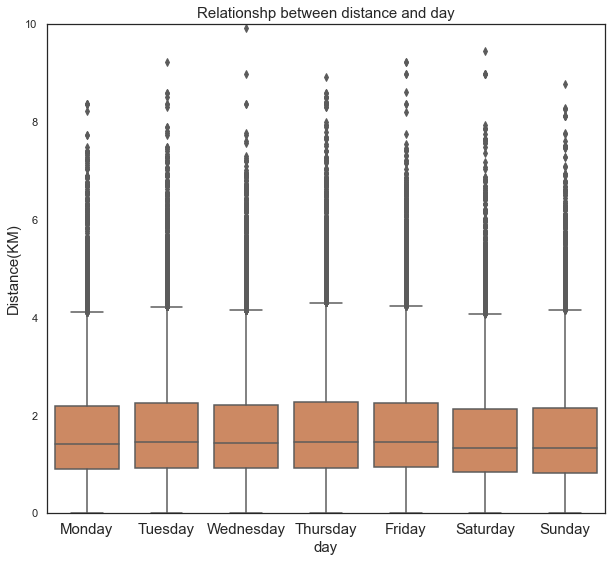

In [50]:
plotbox('day','distance',y_lim,y_label,size)

In [51]:

bike.groupby('day')['distance'].mean()

day
Monday       1.671478
Tuesday      1.710799
Wednesday    1.697297
Thursday     1.721628
Friday       1.721705
Saturday     1.614895
Sunday       1.604705
Name: distance, dtype: float64

The least amount of distance was covered during the weekends while the highest was covered on Thursday and Friday  

 ### Relationship between distance and gender

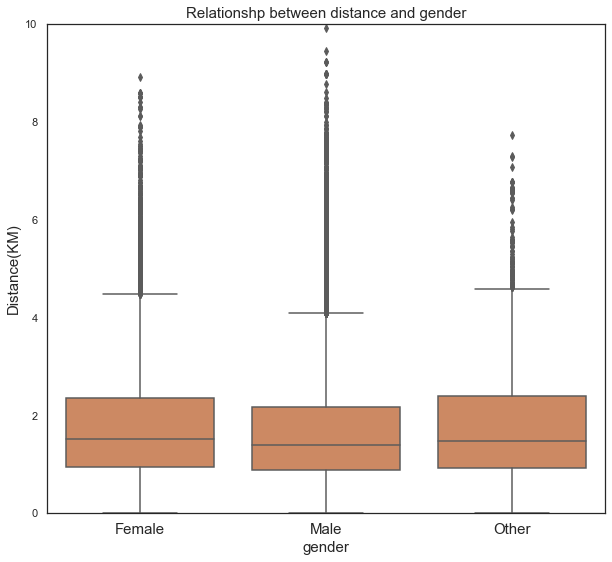

In [52]:
y_lim = (0,10)
size = (8,4)
plotbox('gender','distance',y_lim,y_label,size)

In [53]:
bike.groupby('gender')['distance'].mean()

gender
Female    1.765957
Male      1.663196
Other     1.797039
Name: distance, dtype: float64

Males covered the least distance of the two genders whilst users who were neither male nor female covered the highest distance.

### Relationship between distance and age group?

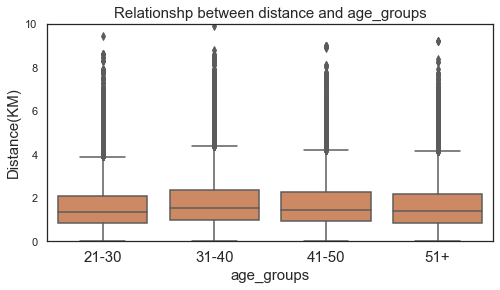

In [54]:
size = [8,4]
y_lim = [0,10]
plotbox('age_groups','distance',y_lim,y_label,size)

In [55]:
bike.groupby('age_groups')['distance'].mean()

age_groups
21-30    1.575210
31-40    1.764877
41-50    1.714032
51+      1.641725
Name: distance, dtype: float64

Users aged 21-30 years covered the least distance of the four age groups.Those in the 31-40 age group,which was dominant,covered the highest distance.

### Relationship between distance and user type?

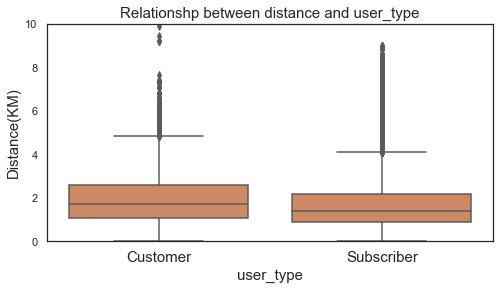

In [56]:
y_lim = [0,10]
plotbox('user_type','distance',y_lim,y_label,size)

In [57]:
bike.groupby('user_type')['distance'].mean()

user_type
Customer      1.899066
Subscriber    1.668084
Name: distance, dtype: float64

Subscribers generary covered less distance than customers.

###  What are theTrends in  trip duration?

In [1]:
y_lim =(0,2500)
line_plot('time','duration',y_lim)

NameError: name 'line_plot' is not defined

Greatest variability in the duration covered was recorded between 12am to 5 am.High variability was also observed between 10pm to 12am.The least variability was recorded between 6am to 10pm.In generary time spent per trip increased from 12am to around 5pm followed by steady increase then a decline upto 12am.

### Relationship between trip duration and time of the day?

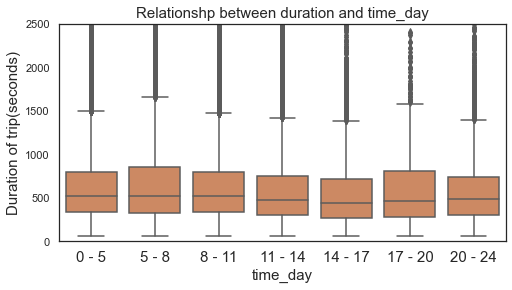

In [59]:
size = [10,9]
y_lim = [0,2500]
y_label = "Duration of trip(seconds)"
plotbox('time_day','duration',y_lim,y_label,size)

In [60]:
bike.groupby('time_day')['duration'].mean()

time_day
0 - 5      694.739883
5 - 8      809.427694
8 - 11     687.604587
11 - 14    687.653257
14 - 17    700.029669
17 - 20    923.082375
20 - 24    596.342752
Name: duration, dtype: float64

### Relationship between duration and day of the week?

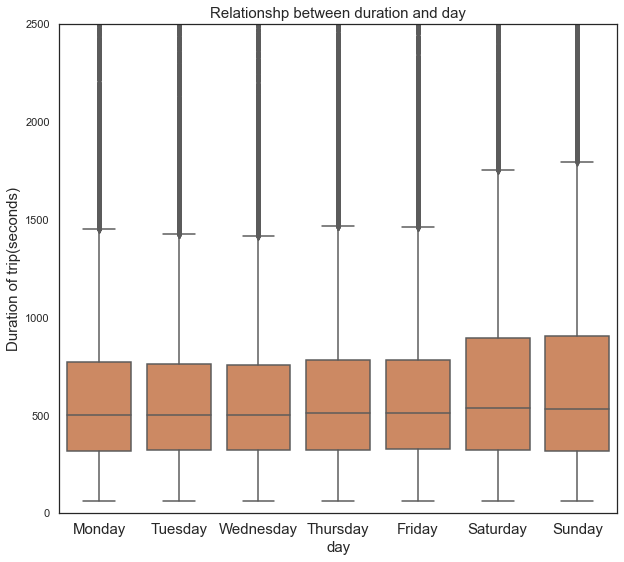

In [61]:
size = [10,9]
y_lim = [0,2500]
plotbox('day','duration',y_lim,y_label,size)

In [62]:
bike.groupby('day')['duration'].mean()

day
Monday       693.745086
Tuesday      652.839459
Wednesday    659.378800
Thursday     675.862241
Friday       681.274699
Saturday     838.228074
Sunday       858.673649
Name: duration, dtype: float64

The highest time spent per trip was recorded on the weekends with sunday having the highest.The lowest time per trip was recorded on Tuesday.

###  What is the relationship between trip duration and gender?

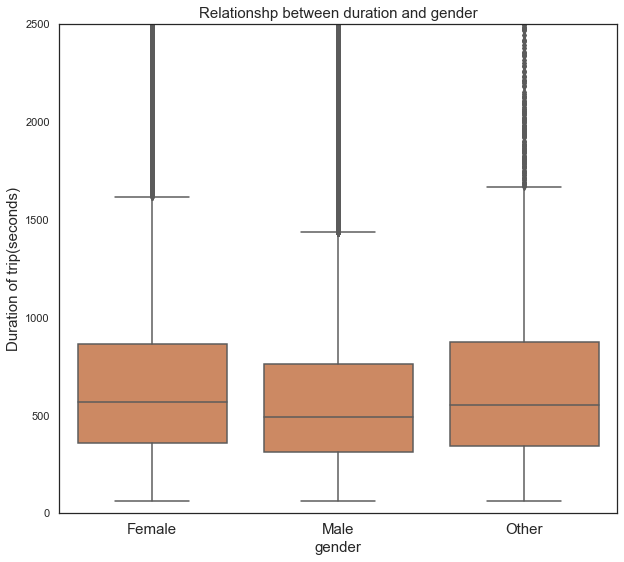

In [63]:
plotbox('gender','duration',y_lim,y_label,size)

In [64]:
bike.groupby('gender')['duration'].mean()

gender
Female    774.873392
Male      670.483260
Other     974.971201
Name: duration, dtype: float64

Whilst men covered the least distance per trip,they also used the lowest time per trip.

### Relationship between trip duration and age group?

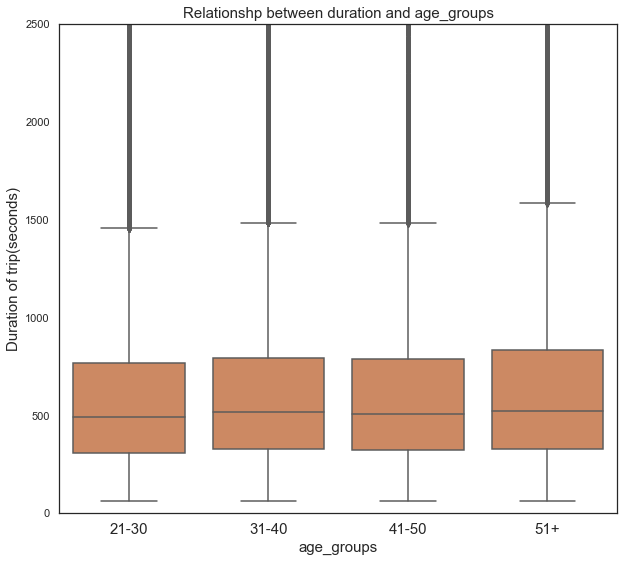

In [65]:
plotbox('age_groups','duration',y_lim,y_label,size)

In [66]:
bike.groupby('age_groups')['duration'].mean()

age_groups
21-30    683.477576
31-40    703.113641
41-50    703.703304
51+      729.874665
Name: duration, dtype: float64

The 21-30 age group spend the least time per trip while the eldest age group spend the highest time per trip.

### Relationship between trip duration and user type?

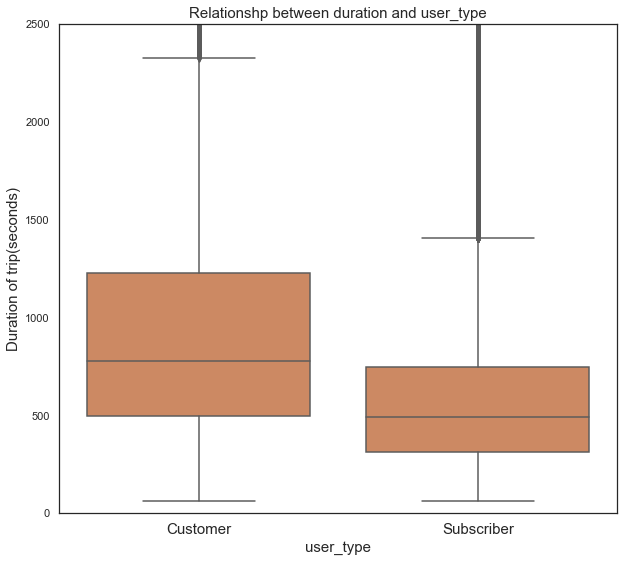

In [67]:
y_lim = (0,2500)
plotbox('user_type','duration',y_lim,y_label,size)

customers generary used the bikes for longer durations than subscribers.This is an interesting insight which means that non subscribers might be using their bikes for longer durations to maximise their utility than members who know they have a subscription and thus can use them as often as needed.Customers on the other hand might be limited by finances and thus utilise the bikes fully when funds are available to ren them out.

### Relationship between gender and age?

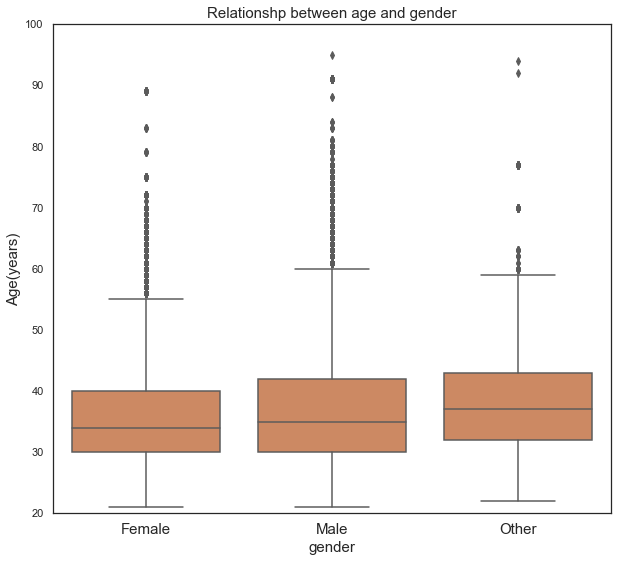

In [68]:
size = (8,4)
y_lim = (20,100)
y_label = "Age(years)"
plotbox('gender','age',y_lim,y_label,size)

In [69]:
bike.groupby('gender')['age'].mean()

gender
Female    36.222557
Male      37.453658
Other     38.902084
Name: age, dtype: float64

The users who were neither males nor females were generary older than the other two genders.Women had the lowest mean age.


### Relationship between gender and age group?

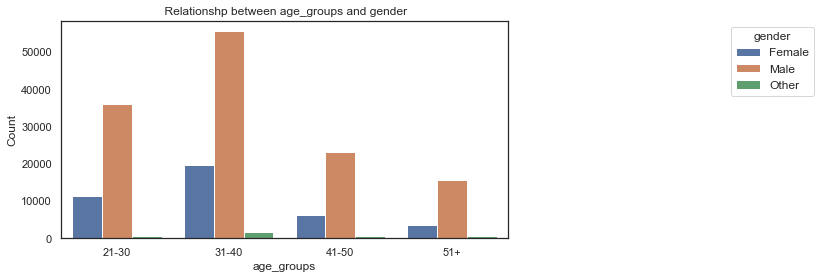

In [80]:
### define a function to make a clustered bar chart
def catplot(var_a,var_b,ordinal = False):
    """A function to create a  clustered bar chart of two categorical variables"""
    if ordinal == False:
        sb.countplot(data = bike, x = var_a,hue = var_b)
    else:
        sb.countplot(data = bike,x = var_a,hue = var_b,palette = 'rocket_r')
    plt.title(f' Relationshp between {var_a} and {var_b}',fontsize = 12)
    plt.xlabel(f'{var_a}',fontsize = 12)
    plt.ylabel('Count',fontsize = 12)
    plt.legend(title = f'{var_b}',bbox_to_anchor =[1.7,1.0],fontsize = 12)
catplot('age_groups','gender')

Males dominated all the age groups.

### Relationship between gender and time of the day?

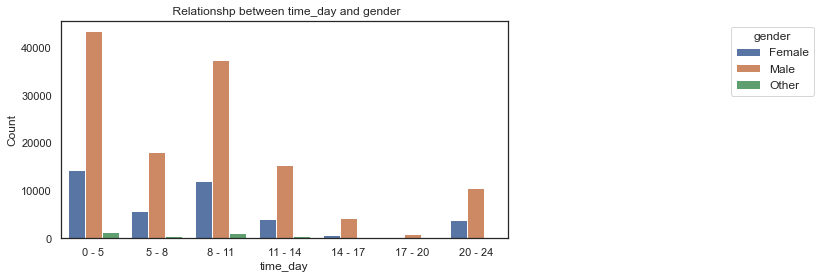

In [81]:
catplot('time_day','gender')

The popular times for bike riding  for the three gender types was between 12 am to 5 am and between 8am to 11 am.No woman rode their bike as from 5pm to 8pm.The 'Other' gender did not undertake any rides past 2pm.

### Relationship between day of the week and gender

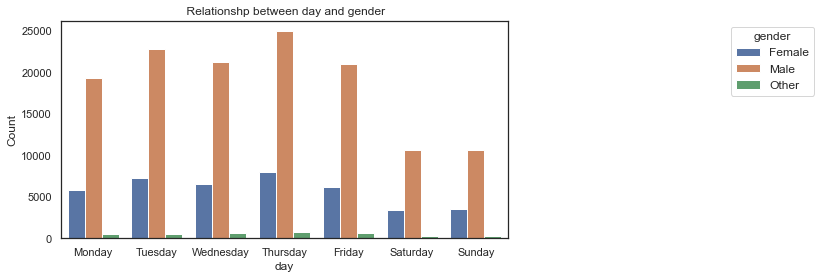

In [82]:
catplot('day','gender')

Thursday was the most popular day for bike rides across the three genders.As noted before the number of bike rides dropped drastically during the weekends.

### Relationship between the age groups and user type

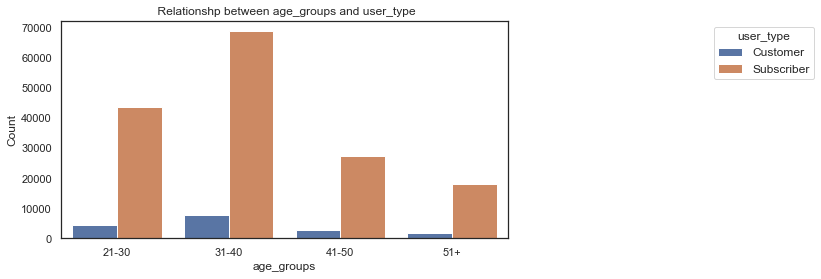

In [83]:
catplot('age_groups','user_type')

Most of the users with a subscription  belong to the dominant 31-40 age group followed by the 21-30 age group.Those without a subscription are aged between 31-40 years.

### Relationship between age groups and Bike share?

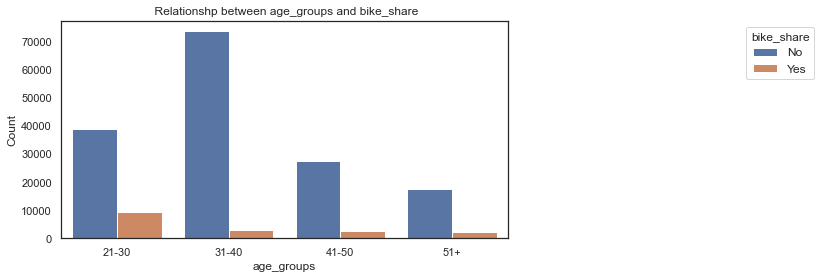

In [84]:
catplot('age_groups','bike_share')

Majority of the customers who share bikes during their trip are aged between 21-30 whilst very few users from the other groups share bikes.

### Relationship between age group and time of day?

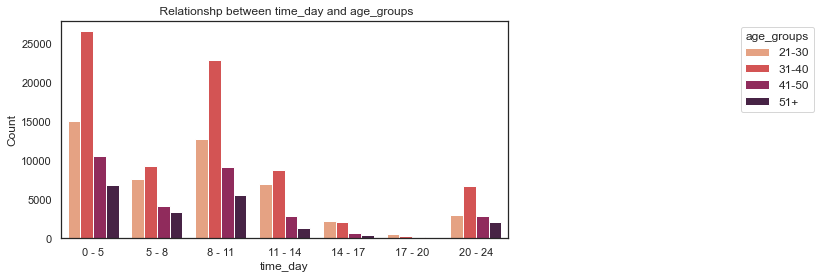

In [85]:
catplot('time_day','age_groups',ordinal = True)

User aged between 31-40 dominated all the times except 2pm to 5pm.Majority of users of all the age groups preffered riding their bikes from 12 am to 5am and between 8am t0 11am.Users aged 41 and above did not like riding form 5 to 8pm.

### Relationship between age groups and day of the week?

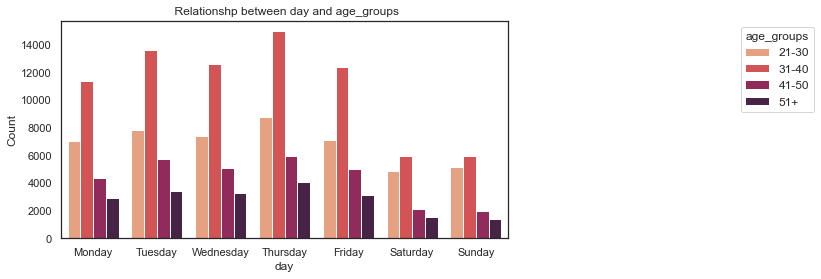

In [86]:
catplot('day','age_groups',ordinal = True)

Thursday was a popular day for riding for all age groups.User aged 21-30 and 31 to 40 formed more than twice the members who turned for bike rides on the weekends.

### Relationshp between gender and bike share for all trip?

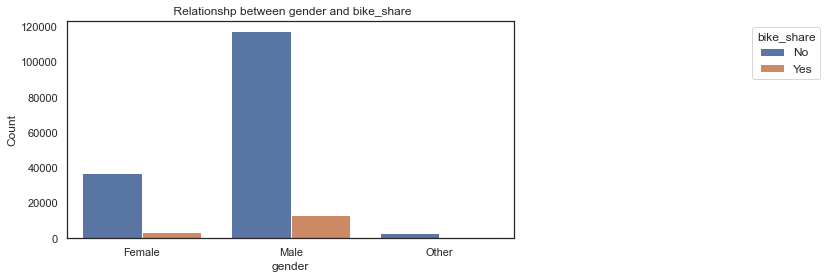

In [77]:
catplot('gender','bike_share')

More males than females share a bike during a trip.While those who arent males and females dont share bikes during their trips.

### Relationshp between gender and user type

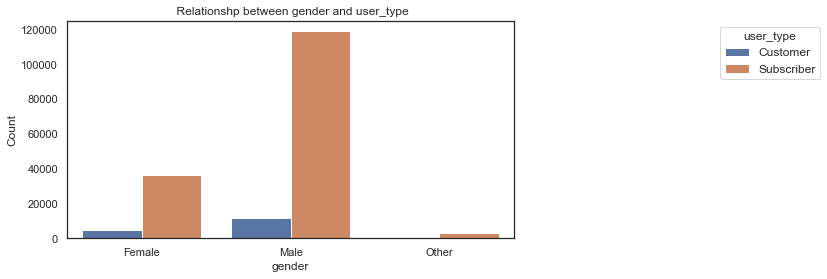

In [78]:
catplot('gender','user_type')

Most of the customers are male,whereas aporixinately a third are female.The other gender type were all subscribers.

## Multivariate Exploration


bike.shape= (174946, 22)
bike_sample.shape= (1000, 22)


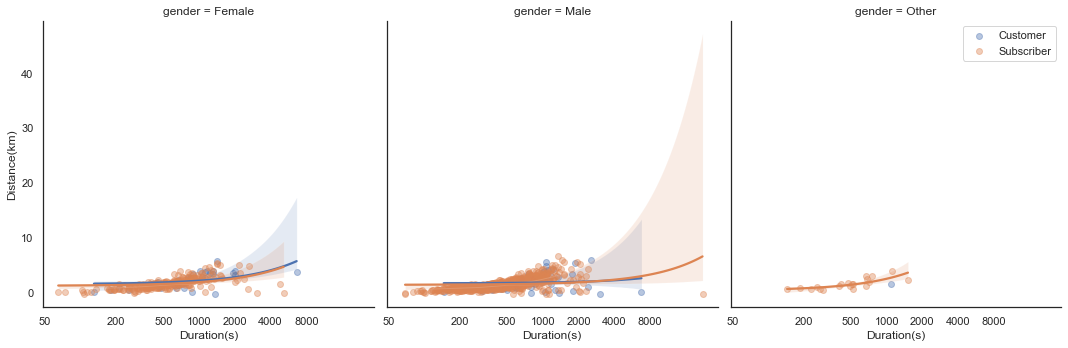

In [87]:
## take a sample 500  bike users to reduce overplotting and produce cleaner plots
print("bike.shape=",bike.shape)
bike_sample = bike.sample(n=1000, replace = False)
print("bike_sample.shape=",bike_sample.shape)
f = sb.FacetGrid( data = bike_sample,col = 'gender',hue = 'user_type',height = 5 )
f.map(sb.regplot,'duration','distance',scatter_kws = {'alpha':2/5},x_jitter = 0.3,y_jitter = 0.3)
f.set(xscale = 'log')
x_ticks = [50,200,500,1000,2000,4000,8000]
f.set(xticks = x_ticks,xticklabels = x_ticks)
f.set_xlabels('Duration(s)')
f.set_ylabels('Distance(km)')

plt.legend()

Female and male  subscribers are associated with longer durations and short distances per trip across a majority of the samples.In both females and male the regression line shows an increase in duration for a smaller increase in distance  for subscribers.I contrast the regression line is dereasing and almost flattening in some samples for customers.This reinforces the conclusion made earlier that there are differences between the distance covered and time per trip for different types of users and gender.

## CONCLUSION

    1) Distance varied with time.Distance covered per trip was characteristed by variability throughout the day.The highest            variability was recorded from 12am to 5am. Distance covered increased steadily from 12 am to 11am and the reduced              to 10am. Distance also varied with the day of the week. The least amount of distance was covered during the weekends            while the highest was covered on Thursday and Friday.

    2) The time of the day barplot showed that the greatest distance was covered between 8pm to 12am. From there there was            a steady decrease in the average distance covered upto 8pm. There was however an increase in the distance covered              from 8am to 11 am.

    3) Duration of trip increased from 12am to around 5pm followed by steady increase then a decline upto 12am.

    4) Thursday was most popular day for more than a third of the respondents.Very few users like cycling on the weekends.

    5) The most frequent cycling time used by the majority of the users was between 12am to 5 am(33.8%) amd between 8 am to            11 am(28.9%).
    6) The highest time spent per trip was recorded on the weekends with sunday having the highest.The lowest time per trip            was recorded on Tuesday.

    7) The duration of trip was influenced by the use type.customers generary used the bikes for longer durations than                subscribers.

    8) The age of the users also varied with the gender of the respondent.The users who were neither males nor females were            generary older than the other two genders.Women had the lowest mean age.
        
 ## Limitations
 
The findings are true only for the month of February since no data was provided for the other months.Outliers present in the dataset were dropped.No statisctical tests were conducted.
